# Polynomial regression by normal method

### Dataset generation
- Generate 10 data points $f(x)=sin(2\pi x)$ where $x \hspace{0.1cm} \epsilon \hspace{0.1cm} [0, 1]$ is sampled uniformly.
- Add Gaussian noise $N(0, 0.5)$ to the generated data. By generating data in this way, we are capturing a property of many real data sets - namely, that they possess an underlying regularity $f(x)$, which we wish to learn, but that individual observations are corrupted by random noise $N(0,0.5)$.
- We will now use this set of 10 data points as the training dataset.

In [36]:
#numpy, matplotlib, seaborn, pandas libraries were used here.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [37]:
#creation of training 10 datasets.
N=10
#linear spaced 10 datasets.
random_x=np.linspace(0,1,N)
random_x.sort()

tetha=2*np.pi*random_x
random_y=np.sin(tetha)
#random y value of sin(x)
random_y

mean=0
sigma=0.5
noise=np.random.normal(mean,sigma,random_y.shape)

#adding noise to the datasets such that mean=0 and standard deviation=0.5 of normal distribution.
Final_value=random_y+noise

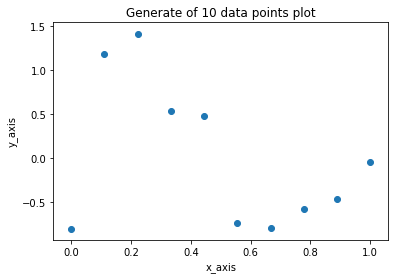

In [38]:
#Final scattering plot of 10 random datasets.
plt.scatter(random_x,Final_value)
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Generate of 10 data points plot')
plt.show()

In [39]:
#random_x value
random_x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [40]:
#random_y value
random_y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [41]:
#noise value
noise

array([-0.80108562,  0.54806617,  0.43319514, -0.32307208,  0.14250991,
       -0.38865347,  0.07586446,  0.41120818,  0.17673206, -0.03668145])

In [42]:
#tetha value
tetha

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [43]:
#Final_value
Final_value

array([-0.80108562,  1.19085378,  1.41800289,  0.54295333,  0.48453006,
       -0.73067361, -0.79016095, -0.57359958, -0.46605555, -0.03668145])

### Polynomial curve fitting 
- Fit 5 polynomial regression models with varying polynomial orders $M = \{0, 1, 3, 6, 9\}$ on the training dataset. Use the polynomial function of the form:  $y(x, \textbf{w})=\sum^{M}_{j=0}w_jx^j$ and $L2$ loss as the error function: $E(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2$, where $t_n$ is the true output for the input $x_n$, and $N$ is the total number of training points.
- For each model: $M = \{0, 1, 3, 6, 9\}$, plot the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points. 
- Report the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.
- For each model: $M = \{0, 1, 3, 6, 9\}$, report the coefficients $\textbf{w}^*$. Explain the trend in the coefficients with increasing model complexity. 
- The goal here is to achieve good generalization by making
accurate predictions for new data, and not the training data. Use the data generation procedure used previously to generate 100 data points but with new choices for the random noise values included in the target values. These 100 data points will now form our validation dataset.
- Evaluate each model: $M = \{0, 1, 3, 6, 9\}$ on the validation set and report the mean squared error for each model. 
- Plot the training and validation set mean squared errors for models with $M = \{0, 1, 3, 6, 9\}$ on the same graph. Explain the trend in the error values with increasing model complexity.

In [44]:
def polynomial_curve_fitting(random_x,M):
    A=np.zeros((M+1,M+1))
    num=len(random_x)
    
    #This is the code to find of w(i).
    for i in range(M+1):
        for j in range(M+1):
            A[i,j]= sum([x**(i+j) for x in random_x ])
        
    B=np.zeros((M+1,1))
    for i in range(M+1):
        B[i]=sum([Final_value[j]*random_x[j]**i for j in range(num)])

    A_inverse=np.linalg.inv(A)
    w_values=np.matmul(A_inverse,B)
    
    return w_values

In [45]:
#This is the to find out the polynomial function.
def fn(x,w_values):
    function=0
    w=len(w_values)
    for k in range(w):
        function += w_values[k]*(x**k)
    return function

In [46]:
M=9
w_values=polynomial_curve_fitting(random_x,M)

In [47]:
#This code helps in calculating y_value for the found out polynomial function.
y_axis=[fn(x,w_values) for x in random_x]

plot of  the graph of the function obtained from fitting the model onto the training dataset along with the training dataset points.

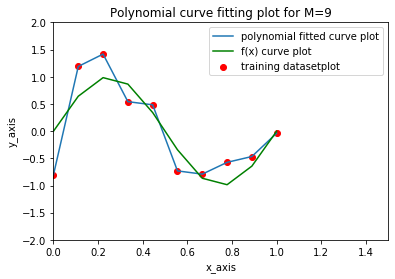

In [48]:
#This is Polynomial curve fitting plot.
plt.plot(random_x,y_axis,label='polynomial fitted curve plot')
plt.scatter(random_x,Final_value,color='red',label='training datasetplot')
plt.plot(random_x,random_y,color='green',label='f(x) curve plot')
plt.ylim((-2,2))
plt.xlim((0,1.5))
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Polynomial curve fitting plot for M={}'.format(M) )
plt.legend()
plt.show()

Report of the mean squared error on the training dataset and the coeffcient of w

In [49]:
#Mean square error
mse_value={}
mse_test=[]
w_values_all={}
M=[0,1,3,6,9]
for m in M:
    w_values=polynomial_curve_fitting(random_x,m)
    w_values_all.update({'M={}'.format(m):w_values})
    #This code helps in calculating y_value for the found out polynomial function.
    y_axis=[fn(x,w_values) for x in random_x]
    
    total=0
    for i in range(N):
        total += (Final_value[i]-y_axis[i])**2
    MSE=total/N
    mse_value.update({'{}'.format(m):MSE})
    mse_test.append(MSE)

 The coefficients of  𝐰.

In [50]:
w_values_all

{'M=0': array([[0.02380833]]),
 'M=1': array([[ 0.56629796],
        [-1.08497927]]),
 'M=3': array([[ -0.44181829],
        [ 14.32284109],
        [-39.25594121],
        [ 25.61933407]]),
 'M=6': array([[  -0.7965621 ],
        [  30.82965905],
        [-145.20275381],
        [ 285.83008024],
        [-314.61337085],
        [ 201.33217547],
        [ -57.43053962]]),
 'M=9': array([[-8.01034504e-01],
        [-2.01423931e+02],
        [ 5.19602484e+03],
        [-4.73920618e+04],
        [ 2.20870761e+05],
        [-5.93444276e+05],
        [ 9.56270063e+05],
        [-9.12059518e+05],
        [ 4.74489007e+05],
        [-1.03727812e+05]])}

mean squared error on the training dataset

In [51]:
Mean_square_error = pd.DataFrame(mse_value,index=['Mean_square_error on training data'])
Mean_square_error=Mean_square_error.transpose()
Mean_square_error['M_value']=['M=0','M=1','M=3','M=6','M=9']
Mean_square_error

,Mean_square_error on training data,M_value
0,6.300310e-01,M=0
1,5.101331e-01,M=1
3,1.231511e-01,M=3
6,3.154278e-02,M=6
9,5.807022e-09,M=9


 Creation of validation dataset (100 data points).

In [52]:
#creation of 100 validation datasets.
Nv=100
random_x_valid=np.linspace(0,1,Nv)
random_x_valid.sort()

tetha_valid=2*np.pi*random_x_valid
random_y_valid=np.sin(tetha_valid)
random_y_valid

mean_valid=0
sigma_valid=0.5
noise_valid=np.random.normal(mean_valid,sigma_valid,random_y_valid.shape)

Final_value_valid=random_y_valid+noise_valid

In [53]:
#Final_value_valid

 Evaluating model for 100 new validation datasets.

In [54]:
#This code helps in calculating y_value for the found out polynomial function.
#Mean square error
mse_value_valid=[]
M=[0,1,3,6,9]
for m in M:
    w_values=polynomial_curve_fitting(random_x,m)
    
    #This code helps in calculating y_value for the found out polynomial function.
    y_axis_valid=[fn(x,w_values) for x in random_x_valid]
    
    total=0
    for i in range(N):
        total += (Final_value_valid[i]-y_axis_valid[i])**2
    MSE=total/Nv
    mse_value_valid.append(MSE)


In [55]:
mse_value_valid
Mean_square_error['Mean_square_error on validation data']=mse_value_valid
Mean_square_error

,Mean_square_error on training data,M_value,Mean_square_error on validation data
0,6.300310e-01,M=0,[0.0362578433700038]
1,5.101331e-01,M=1,[0.01865765611618459]
3,1.231511e-01,M=3,[0.03662155862427861]
6,3.154278e-02,M=6,[0.04997556962062541]
9,5.807022e-09,M=9,[0.6380800196539298]


 Report of the mean squared error on the validation dataset and plot.

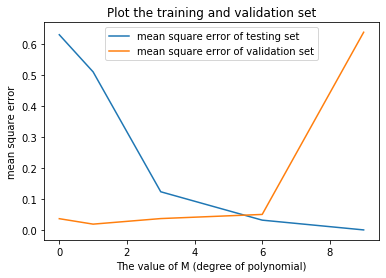

In [56]:
plt.plot(M,mse_test,label='mean square error of testing set')
plt.plot(M,mse_value_valid,label='mean square error of validation set')
plt.xlabel('The value of M (degree of polynomial)')
plt.ylabel('mean square error')
plt.title( 'Plot the training and validation set')
plt.legend()
plt.show()

### Regularization

We've seen the effects of increasing model complexity on the training error and the validation error above. We will now use L2 regularization to reduce overfitting.

- Fit a polynomial regression model of order $M=9$ to the same training dataset as before but now using the regularized error function given by $E^{'}(\textbf{w})= \frac{1}{2}\sum^{N}_{n=1}\{y(x_n, \textbf{w}) - t_n)\}^2 + \frac{\lambda}{2}{\|\textbf{w}\|}^2$ where $\lambda$ is the regularization hyperparameter. Use the following values for $\lambda$: $\lambda={0.01, 0.1, 1}$.
- Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.
- Find the optimal value of the hyperparameter $\lambda$. 
- Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

In [57]:
def polynomial_curve_fitting_regularization(random_x,Mr,lamda):
    
    Ar=np.zeros((Mr+1,Mr+1))
    numr=len(random_x)
   
    #This is the code to find of w(i).
    for i in range(Mr+1):
        for j in range(Mr+1):
            if i==j:
                Ar[i,j]=lamda + sum([x**(i+j) for x in random_x ])
            else:
                Ar[i,j]= sum([x**(i+j) for x in random_x ])
        
    Br=np.zeros((Mr+1,1))
    for i in range(Mr+1):
        Br[i]=sum([Final_value[j]*random_x[j]**i for j in range(numr)])

    A_inverser=np.linalg.inv(Ar)
    w_valuesr=np.matmul(A_inverser,Br)
    
    return w_valuesr

In [58]:
#This is the to find out the polynomial function.
def fnr(x,w_valuesr):
    function=0
    wr=len(w_valuesr)
    for k in range(wr):
        function += w_valuesr[k]*(x**k)
    return function

In [59]:
polynomial_curve_fitting_regularization(random_x,9,0)

array([[-8.01034504e-01],
       [-2.01423931e+02],
       [ 5.19602484e+03],
       [-4.73920618e+04],
       [ 2.20870761e+05],
       [-5.93444276e+05],
       [ 9.56270063e+05],
       [-9.12059518e+05],
       [ 4.74489007e+05],
       [-1.03727812e+05]])

 The coefficients of  𝐰 for regularisation.

In [60]:
Mr=9
mse_value_reg={}
w_values_reg={}
lamda=[0,0.01,0.1,1]
for i in lamda:
    w_values_r=polynomial_curve_fitting_regularization(random_x,Mr,i)
    w_values_reg.update({'lamda={}'.format(i):w_values_r})
    
    #This code helps in calculating y_value for the found out polynomial function.
    y_axis_reg=[fnr(x,w_values_r) for x in random_x]
    
    total=0
    for j in range(N):
        total += (Final_value[j]-y_axis_reg[j])**2
    MSE=total/N
    
    mse_value_reg.update({'lamda={}'.format(i):MSE})
#Mean square value for testing data.
mse_value_reg

{'lamda=0': array([5.80702185e-09]),
 'lamda=0.01': array([0.2975981]),
 'lamda=0.1': array([0.40212923]),
 'lamda=1': array([0.49887499])}

In [61]:
#w_values_reg

In [62]:
#This code helps in calculating y_value for the found out polynomial function.
lam=0.01
w_values_r=polynomial_curve_fitting_regularization(random_x,9,lam)
y_axisr=[fnr(x,w_values_r) for x in random_x]

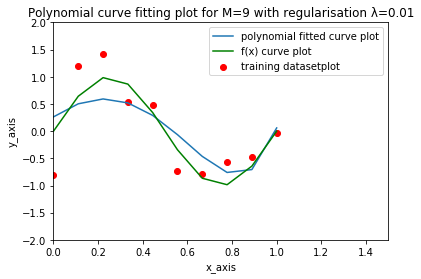

In [63]:
#This is Polynomial curve fitting plot.
plt.plot(random_x,y_axisr,label='polynomial fitted curve plot')
plt.scatter(random_x,Final_value,color='red',label='training datasetplot')
plt.plot(random_x,random_y,color='green',label='f(x) curve plot')
plt.ylim((-2,2))
plt.xlim((0,1.5))
plt.xlabel('x_axis')
plt.ylabel('y_axis')
plt.title('Polynomial curve fitting plot for M=9 with regularisation λ={}'.format(lam) )
plt.legend()
plt.show()

Comparing the validation error results of the following two models : polynomial regression model of order  𝑀=9  without regularization and polynomial regression model of order  𝑀=9  with regularization hyperparameter as estimated above.

In [64]:
#This code helps in calculating y_value for the found out polynomial function.
#Mean square error
mse_value_hyp={}
lamda=[0,0.01,0.1,1]
for lam in lamda:
    w_values_r=polynomial_curve_fitting_regularization(random_x,9,lam)
    y_axis_validr=[fnr(x,w_values_r) for x in random_x_valid]
    
    total_validr=0
    for i in range(Nv):
        total_validr += (Final_value_valid[i]-y_axis_validr[i])**2
    MSE_validr=total_validr/Nv
    
    mse_value_hyp.update({'lamda={}'.format(lam):MSE_validr})

#Mean square value for validation data
mse_value_hyp

{'lamda=0': array([1.25250139]),
 'lamda=0.01': array([0.26278542]),
 'lamda=0.1': array([0.34141962]),
 'lamda=1': array([0.50803441])}

# Observation and Result:

### Polynomial curve fitting

Q.the mean squared error on the training dataset and explain its trend with increasing model complexity. Comment on overfitting and underfitting.?

The mean square on the training dataset was found to decrease as the M increases.
For M=0 it was underfitting.
For M=9 it was overfitting.

mean squared error on the training dataset

In [65]:
Mean_square_error

,Mean_square_error on training data,M_value,Mean_square_error on validation data
0,6.300310e-01,M=0,[0.0362578433700038]
1,5.101331e-01,M=1,[0.01865765611618459]
3,1.231511e-01,M=3,[0.03662155862427861]
6,3.154278e-02,M=6,[0.04997556962062541]
9,5.807022e-09,M=9,[0.6380800196539298]


For each model:  𝑀={0,1,3,6,9} , report the coefficients  𝐰∗

As the w value increases the model complexity was increasing.

In [66]:
w_values_all

{'M=0': array([[0.02380833]]),
 'M=1': array([[ 0.56629796],
        [-1.08497927]]),
 'M=3': array([[ -0.44181829],
        [ 14.32284109],
        [-39.25594121],
        [ 25.61933407]]),
 'M=6': array([[  -0.7965621 ],
        [  30.82965905],
        [-145.20275381],
        [ 285.83008024],
        [-314.61337085],
        [ 201.33217547],
        [ -57.43053962]]),
 'M=9': array([[-8.01034504e-01],
        [-2.01423931e+02],
        [ 5.19602484e+03],
        [-4.73920618e+04],
        [ 2.20870761e+05],
        [-5.93444276e+05],
        [ 9.56270063e+05],
        [-9.12059518e+05],
        [ 4.74489007e+05],
        [-1.03727812e+05]])}

Q.report of the on the validation set on mean squared error for each model.

In [67]:
Mean_square_error

,Mean_square_error on training data,M_value,Mean_square_error on validation data
0,6.300310e-01,M=0,[0.0362578433700038]
1,5.101331e-01,M=1,[0.01865765611618459]
3,1.231511e-01,M=3,[0.03662155862427861]
6,3.154278e-02,M=6,[0.04997556962062541]
9,5.807022e-09,M=9,[0.6380800196539298]


Q.Plot the training and validation set mean squared errors for models with  𝑀={0,1,3,6,9}  on the same graph. Explain the trend in the error values with increasing model complexity.

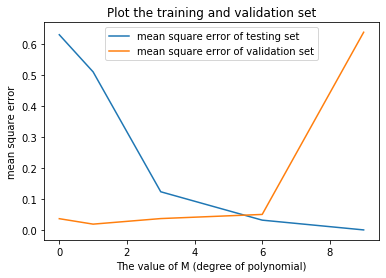

In [68]:
plt.plot(M,mse_test,label='mean square error of testing set')
plt.plot(M,mse_value_valid,label='mean square error of validation set')
plt.xlabel('The value of M (degree of polynomial)')
plt.ylabel('mean square error')
plt.title( 'Plot the training and validation set')
plt.legend()
plt.show()

For the training dataset the mean square error was decreasing but for the validation dataset the mean square error was increasing.
As the model complexity increases the mean square error for the testing dataset decreases and for validation dataset it increases.

### Regularization

Q.Report the coefficients of the model fit above for $\lambda={0.01, 0.1, 1}$. Explain the trend in the coefficient values with increasing $\lambda$.

In [69]:
w_values_reg

{'lamda=0': array([[-8.01034504e-01],
        [-2.01423931e+02],
        [ 5.19602484e+03],
        [-4.73920618e+04],
        [ 2.20870761e+05],
        [-5.93444276e+05],
        [ 9.56270063e+05],
        [-9.12059518e+05],
        [ 4.74489007e+05],
        [-1.03727812e+05]]),
 'lamda=0.01': array([[ 0.26313264],
        [ 2.79639005],
        [-5.43874692],
        [-2.29656651],
        [ 0.39408511],
        [ 1.58008608],
        [ 1.69367174],
        [ 1.19522092],
        [ 0.39470501],
        [-0.52256999]]),
 'lamda=0.1': array([[ 0.49223488],
        [-0.02015022],
        [-1.33470403],
        [-0.87337268],
        [-0.32396234],
        [ 0.07054197],
        [ 0.31967684],
        [ 0.46621812],
        [ 0.54619851],
        [ 0.58463329]]),
 'lamda=1': array([[ 0.28789021],
        [-0.26536795],
        [-0.3639303 ],
        [-0.24346112],
        [-0.12012169],
        [-0.02468469],
        [ 0.04491669],
        [ 0.09519299],
        [ 0.13176589],
        

For the lambda=0 the curve was over fitting and as the lambda was increasing we had best fit and futher increases causes underfitting.

 Q.Find the optimal value of the hyperparameter $\lambda$ and Compare the validation error results of the following two models : polynomial regression model of order $M=9$ without regularization and polynomial regression model of order $M=9$ with regularization hyperparameter as estimated above.

In [70]:
mse_value_hyp

{'lamda=0': array([1.25250139]),
 'lamda=0.01': array([0.26278542]),
 'lamda=0.1': array([0.34141962]),
 'lamda=1': array([0.50803441])}

The mean square error was found to be minimmum for lamda=0.01 so the optimal value of the hyperparameter is $\lambda$ =0.01.
Above lamda=0 is the mean square error of polynomial regression model of order $M=9$ without regularization